In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [ ]:
df = pd.DataFrame(pd.read_csv("/content/insurance.csv"))
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#checking duplicates
sum(df.duplicated(subset = 'region'))
#duplicate values

1334

In [ ]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# EDA

   children
0       574
1       324
2       240
3       157
4        25
5        18
[0 1 2 3 4 5]


array([<Axes: ylabel='children'>], dtype=object)

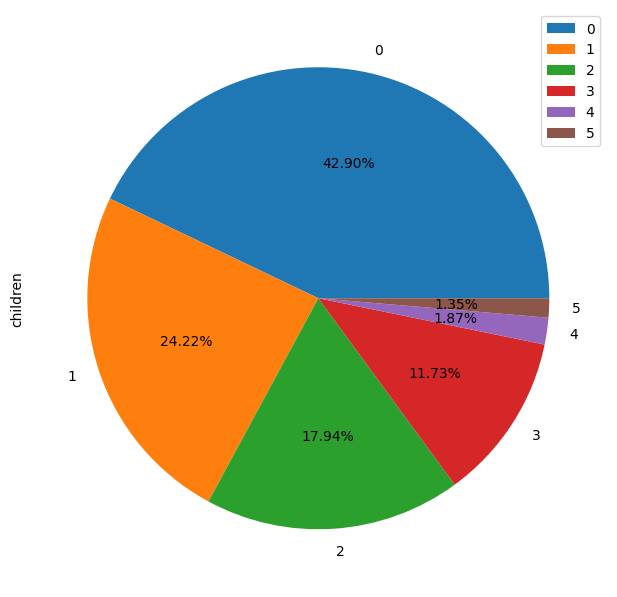

In [ ]:
#no of children pie plot
df_sym = pd.DataFrame(df['children'].value_counts())
print(df_sym)

print(df_sym.index.values)
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.2f%%', figsize = (15,7.5))

In [ ]:
df[['region','expenses']]

,region,expenses
0,southwest,16884.92
1,southeast,1725.55
2,southeast,4449.46
3,northwest,21984.47
4,northwest,3866.86
...,...,...
1333,northwest,10600.55
1334,northeast,2205.98
1335,southeast,1629.83
1336,southwest,2007.95


               expenses
region                 
northeast  13406.384691
northwest  12417.575169
southeast  14735.411538
southwest  12346.937908


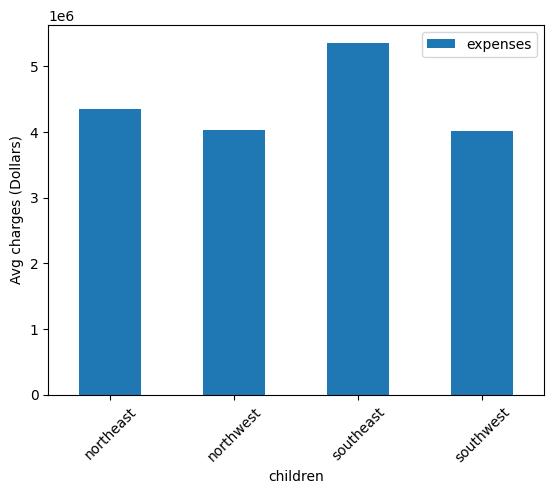

In [ ]:
#region vs expenses barplot
print(df[['region','expenses']].groupby("region").mean())  # sum() can also be used

plt1 = df[['region','expenses']].groupby("region").sum()
plt1.plot(kind='bar',legend = True,)
plt.xlabel("children")
plt.ylabel("Avg charges (Dollars)")
xticks(rotation = 45)
plt.show()

      region  children
0  northeast  1.046296
1  northwest  1.147692
2  southeast  1.049451
3  southwest  1.141538


<ipython-input-15-aa4f52c15455>:6: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'region', kind='bar',legend = True, sort_columns = True, figsize = (15,3))


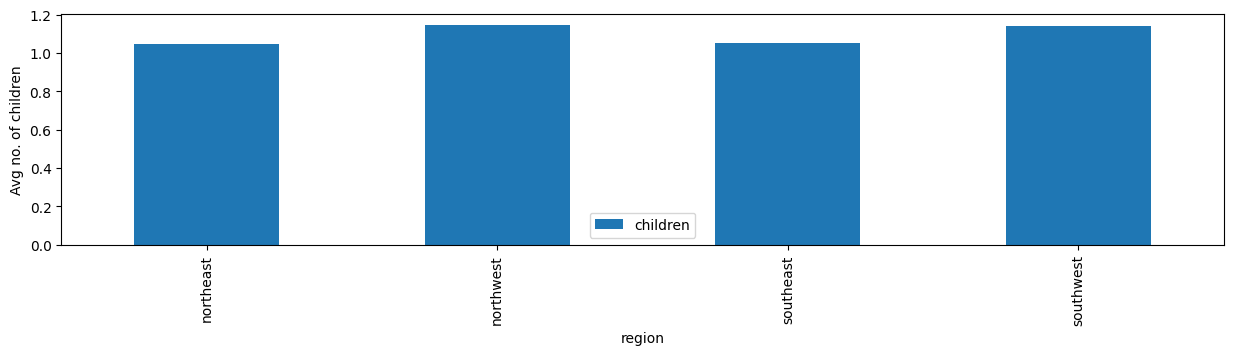

In [ ]:
#region vs avg no of children
df_comp_avg_price = df[['region','children']].groupby("region", as_index = False).mean()
print(df_comp_avg_price)


plt1 = df_comp_avg_price.plot(x = 'region', kind='bar',legend = True, sort_columns = True, figsize = (15,3))
plt.xlabel("region")
plt.ylabel("Avg no. of children")
xticks(rotation = 90)
plt.show()

In [ ]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

   children      expenses
0         0  12365.975767
1         1  12731.171821
2         2  15073.564000
3         3  15355.318535
4         4  13850.656800
5         5   8786.035556


<ipython-input-17-45d10a7b49d9>:5: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'children', kind='bar',legend = True, sort_columns = True, figsize = (15,3))


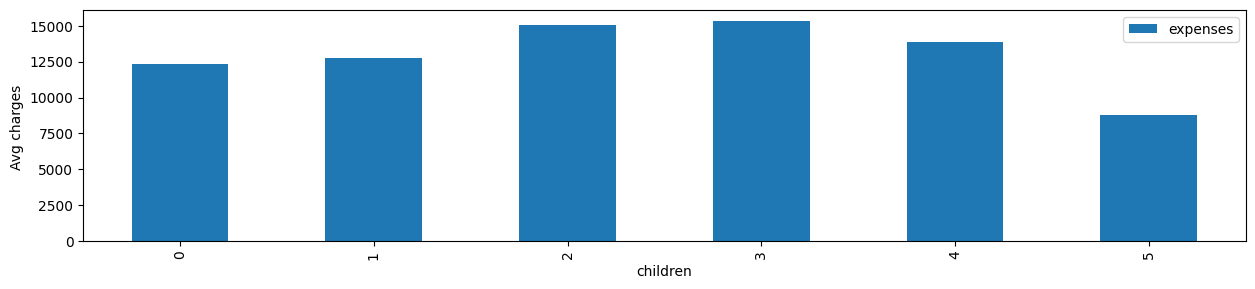

In [ ]:
#no of children vs avg charges

df_comp_avg_price = df[['children','expenses']].groupby("children", as_index = False).mean()
print(df_comp_avg_price)
plt1 = df_comp_avg_price.plot(x = 'children', kind='bar',legend = True, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("children")
plt1.set_ylabel("Avg charges ")
xticks(rotation = 90)
plt.show()

  smoker      expenses
0     no   8434.268449
1    yes  32050.231971


<ipython-input-18-9c6e7004a3f7>:4: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))


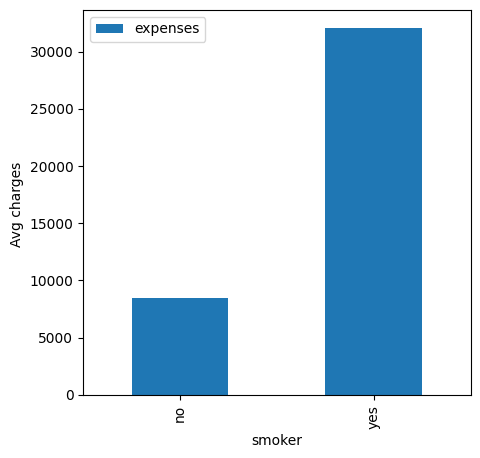

In [ ]:
df_comp_avg_price = df[['smoker','expenses']].groupby("smoker", as_index = False).mean()
print(df_comp_avg_price)

plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))
plt1.set_xlabel("smoker")
plt1.set_ylabel("Avg charges ")
xticks(rotation = 90)
plt.show()

  smoker        bmi
0     no  30.653195
1    yes  30.713139


<ipython-input-19-65a88ef87b0b>:4: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))


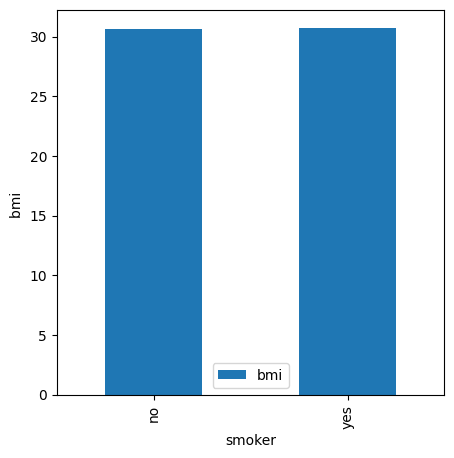

In [ ]:
df_comp_avg_price = df[['smoker','bmi']].groupby("smoker", as_index = False).mean()
print(df_comp_avg_price)

plt1 = df_comp_avg_price.plot(x = 'smoker', kind='bar',legend = True, sort_columns = True, figsize = (5,5))
plt1.set_xlabel("smoker")
plt1.set_ylabel("bmi ")
xticks(rotation = 90)
plt.show()

In [ ]:
auto=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']]

In [ ]:
auto

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


<Figure size 1500x1500 with 0 Axes>

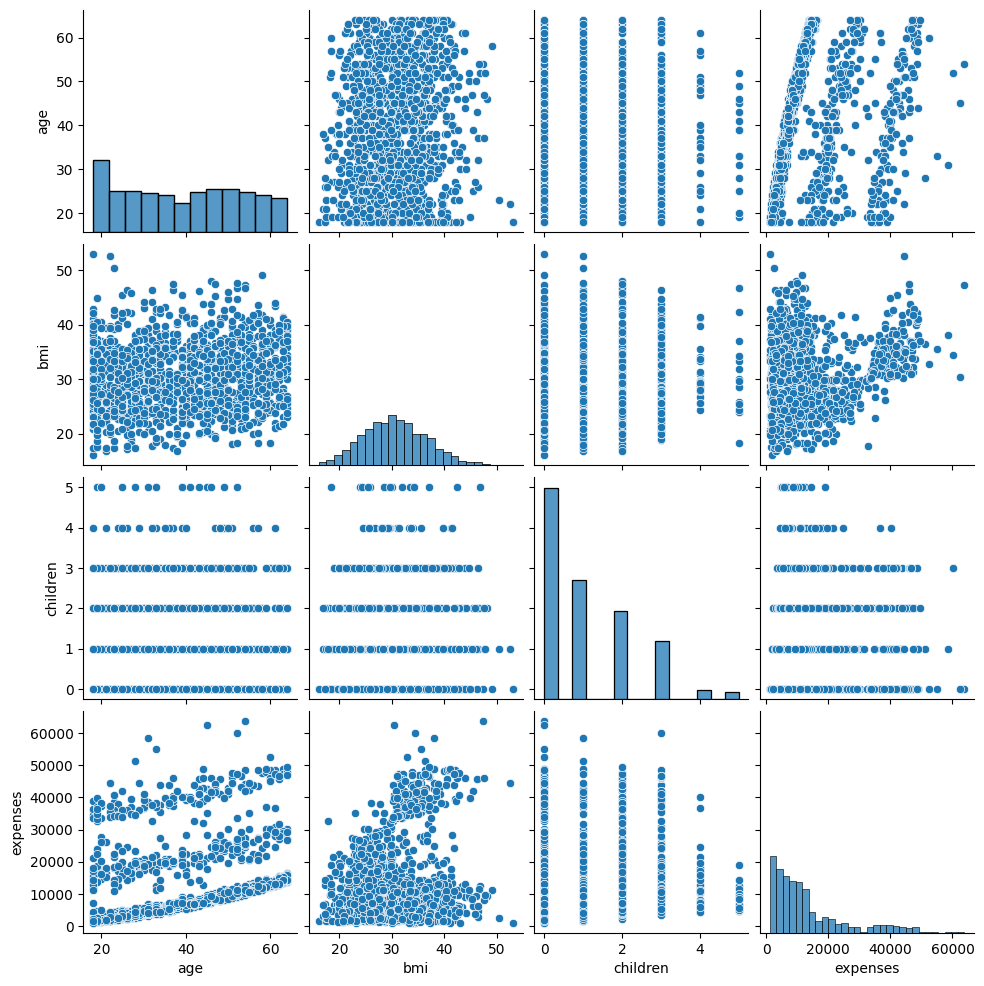

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

In [ ]:
# Dimension reduction

In [ ]:
gender = pd.get_dummies(auto['sex'], drop_first = True)
gender

,male
0,0
1,1
2,1
3,1
4,1
...,...
1333,1
1334,0
1335,0
1336,0


In [ ]:
auto = pd.concat([auto, gender], axis = 1)
auto

,age,sex,bmi,children,smoker,region,expenses,male
0,19,female,27.9,0,yes,southwest,16884.92,0
1,18,male,33.8,1,no,southeast,1725.55,1
2,28,male,33.0,3,no,southeast,4449.46,1
3,33,male,22.7,0,no,northwest,21984.47,1
4,32,male,28.9,0,no,northwest,3866.86,1
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1
1334,18,female,31.9,0,no,northeast,2205.98,0
1335,18,female,36.9,0,no,southeast,1629.83,0
1336,21,female,25.8,0,no,southwest,2007.95,0


In [ ]:
region_typ = pd.get_dummies(auto['region'], drop_first = True)
region_typ

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [ ]:
auto = pd.concat([auto, region_typ], axis = 1)
auto

,age,sex,bmi,children,smoker,region,expenses,male,northwest,southeast,southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,1,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,1,0,0
1334,18,female,31.9,0,no,northeast,2205.98,0,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,1,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0,0,1


In [ ]:
smoker = pd.get_dummies(auto['smoker'], drop_first = True)
smoker

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
auto = pd.concat([auto, smoker], axis = 1)


In [ ]:
auto

,age,sex,bmi,children,smoker,region,expenses,male,northwest,southeast,southwest,yes
0,19,female,27.9,0,yes,southwest,16884.92,0,0,0,1,1
1,18,male,33.8,1,no,southeast,1725.55,1,0,1,0,0
2,28,male,33.0,3,no,southeast,4449.46,1,0,1,0,0
3,33,male,22.7,0,no,northwest,21984.47,1,1,0,0,0
4,32,male,28.9,0,no,northwest,3866.86,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,1,1,0,0,0
1334,18,female,31.9,0,no,northeast,2205.98,0,0,0,0,0
1335,18,female,36.9,0,no,southeast,1629.83,0,0,1,0,0
1336,21,female,25.8,0,no,southwest,2007.95,0,0,0,1,0


In [ ]:
auto.drop(['sex','region','smoker'], axis = 1, inplace = True)

In [ ]:
auto

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
0,19,27.9,0,16884.92,0,0,0,1,1
1,18,33.8,1,1725.55,1,0,1,0,0
2,28,33.0,3,4449.46,1,0,1,0,0
3,33,22.7,0,21984.47,1,1,0,0,0
4,32,28.9,0,3866.86,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,1,1,0,0,0
1334,18,31.9,0,2205.98,0,0,0,0,0
1335,18,36.9,0,1629.83,0,0,1,0,0
1336,21,25.8,0,2007.95,0,0,0,1,0


In [ ]:
# Starting machine learning

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 1)

In [ ]:
df_train

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
744,50,26.4,0,8827.21,1,1,0,0,0
363,21,26.4,1,2597.78,0,0,0,1,0
10,25,26.2,0,2721.32,1,0,0,0,0
970,50,28.2,3,10702.64,0,0,1,0,0
634,51,39.7,1,9391.35,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
715,60,28.9,0,12146.97,1,0,0,1,0
905,26,29.4,2,4564.19,0,0,0,0,0
1096,51,35.0,2,44641.20,0,0,0,0,1
235,40,22.2,2,19444.27,0,0,1,0,1


In [ ]:
df_test

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
559,19,35.5,0,1646.43,1,1,0,0,0
1087,57,31.5,0,11353.23,1,1,0,0,0
1020,51,37.0,0,8798.59,1,0,0,1,0
460,49,36.6,3,10381.48,0,0,1,0,0
802,21,22.3,1,2103.08,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
323,57,40.9,0,11566.30,1,0,0,0,0
1268,20,33.3,0,1880.49,0,0,0,1,0
134,20,28.8,0,2457.21,0,0,0,0,0
1274,26,27.1,0,17043.34,1,0,1,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [ ]:
df_train.head()

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
744,50,26.4,0,8827.21,1,1,0,0,0
363,21,26.4,1,2597.78,0,0,0,1,0
10,25,26.2,0,2721.32,1,0,0,0,0
970,50,28.2,3,10702.64,0,0,1,0,0
634,51,39.7,1,9391.35,1,0,0,1,0


In [ ]:
df_train.describe()

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,38.822650,30.684829,1.104701,13276.698622,0.511752,0.238248,0.264957,0.256410,0.206197
std,14.029097,6.087874,1.222664,12197.308146,0.500129,0.426239,0.441546,0.436884,0.404790
min,18.000000,16.000000,0.000000,1121.870000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.275000,0.000000,4710.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,30.500000,1.000000,9188.005000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.725000,2.000000,16604.305000,1.000000,0.000000,1.000000,1.000000,0.000000
max,64.000000,53.100000,5.000000,63770.430000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['age', 'bmi', 'children', 'expenses']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
744,0.695652,0.280323,0.0,0.122993,1,1,0,0,0
363,0.065217,0.280323,0.2,0.023559,0,0,0,1,0
10,0.152174,0.274933,0.0,0.025531,1,0,0,0,0
970,0.695652,0.328841,0.6,0.152929,0,0,1,0,0
634,0.717391,0.638814,0.2,0.131998,1,0,0,1,0


In [ ]:
df_train.describe()

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.452666,0.395817,0.220940,0.194016,0.511752,0.238248,0.264957,0.256410,0.206197
std,0.304980,0.164094,0.244533,0.194694,0.500129,0.426239,0.441546,0.436884,0.404790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.276954,0.000000,0.057284,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.434783,0.390836,0.200000,0.128752,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504717,0.400000,0.247132,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


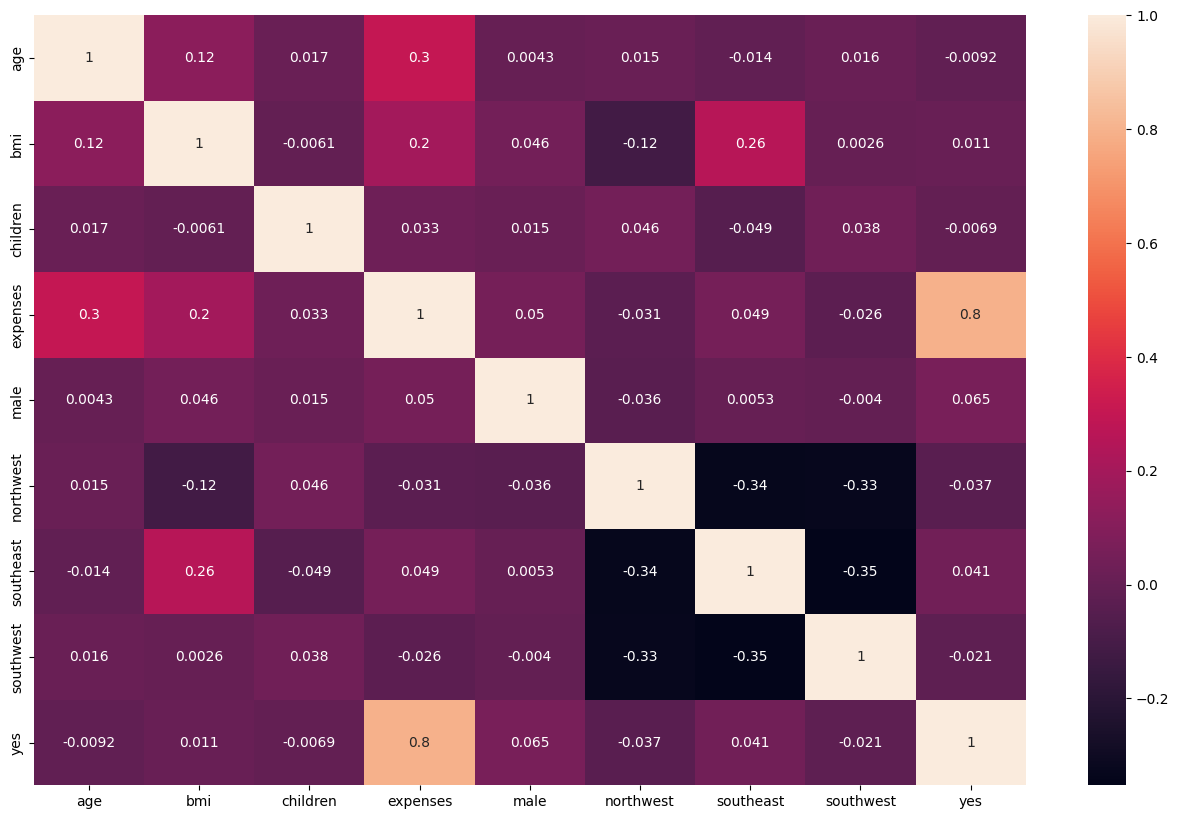

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True,)
plt.show()

In [ ]:
y_train = df_train.pop('expenses')
X_train = df_train

In [ ]:
y_train

744     0.122993
363     0.023559
10      0.025531
970     0.152929
634     0.131998
          ...   
715     0.175983
905     0.054947
1096    0.694658
235     0.292463
1061    0.166522
Name: expenses, Length: 936, dtype: float64

In [ ]:
X_train

,age,bmi,children,male,northwest,southeast,southwest,yes
744,0.695652,0.280323,0.0,1,1,0,0,0
363,0.065217,0.280323,0.2,0,0,0,1,0
10,0.152174,0.274933,0.0,1,0,0,0,0
970,0.695652,0.328841,0.6,0,0,1,0,0
634,0.717391,0.638814,0.2,1,0,0,1,0
...,...,...,...,...,...,...,...,...
715,0.913043,0.347709,0.0,1,0,0,1,0
905,0.173913,0.361186,0.4,0,0,0,0,0
1096,0.717391,0.512129,0.4,0,0,0,0,1
235,0.478261,0.167116,0.4,0,0,1,0,1


In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
# lm.fit(X_train, y_train)

#rfe = RFE(lm, 10)
rfe = RFE(lm, n_features_to_select=10)
#running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
X_train.columns

Index(['age', 'bmi', 'children', 'male', 'northwest', 'southeast', 'southwest',
       'yes'],
      dtype='object')

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('children', True, 1),
 ('male', True, 1),
 ('northwest', True, 1),
 ('southeast', True, 1),
 ('southwest', True, 1),
 ('yes', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children', 'male', 'northwest', 'southeast', 'southwest',
       'yes'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [ ]:
X_train_rfe

,age,bmi,children,male,northwest,southeast,southwest,yes
744,0.695652,0.280323,0.0,1,1,0,0,0
363,0.065217,0.280323,0.2,0,0,0,1,0
10,0.152174,0.274933,0.0,1,0,0,0,0
970,0.695652,0.328841,0.6,0,0,1,0,0
634,0.717391,0.638814,0.2,1,0,0,1,0
...,...,...,...,...,...,...,...,...
715,0.913043,0.347709,0.0,1,0,0,1,0
905,0.173913,0.361186,0.4,0,0,0,0,0
1096,0.717391,0.512129,0.4,0,0,0,0,1
235,0.478261,0.167116,0.4,0,0,1,0,1


In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
X_train_rfe

,const,age,bmi,children,male,northwest,southeast,southwest,yes
744,1.0,0.695652,0.280323,0.0,1,1,0,0,0
363,1.0,0.065217,0.280323,0.2,0,0,0,1,0
10,1.0,0.152174,0.274933,0.0,1,0,0,0,0
970,1.0,0.695652,0.328841,0.6,0,0,1,0,0
634,1.0,0.717391,0.638814,0.2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
715,1.0,0.913043,0.347709,0.0,1,0,0,1,0
905,1.0,0.173913,0.361186,0.4,0,0,0,0,0
1096,1.0,0.717391,0.512129,0.4,0,0,0,0,1
235,1.0,0.478261,0.167116,0.4,0,0,1,0,1


Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     356.3
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          1.22e-276
Time:                        01:02:06   Log-Likelihood:                 861.41
No. Observations:                 936   AIC:                            -1705.
Df Residuals:                     927   BIC:                            -1661.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0395      0.011     -3.548      0.0

In [ ]:
# Dropping male as p-value is high.
X_train_new1 = X_train_rfe.drop(["northwest"], axis = 1)

X_train_new1



,const,age,bmi,children,male,southeast,southwest,yes
744,1.0,0.695652,0.280323,0.0,1,0,0,0
363,1.0,0.065217,0.280323,0.2,0,0,1,0
10,1.0,0.152174,0.274933,0.0,1,0,0,0
970,1.0,0.695652,0.328841,0.6,0,1,0,0
634,1.0,0.717391,0.638814,0.2,1,0,1,0
...,...,...,...,...,...,...,...,...
715,1.0,0.913043,0.347709,0.0,1,0,1,0
905,1.0,0.173913,0.361186,0.4,0,0,0,0
1096,1.0,0.717391,0.512129,0.4,0,0,0,1
235,1.0,0.478261,0.167116,0.4,0,1,0,1


In [ ]:
# # Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new1)
# X_train_lm


In [ ]:
lm = sm.OLS(y_train,X_train_new1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     407.4
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          6.68e-278
Time:                        01:02:06   Log-Likelihood:                 861.27
No. Observations:                 936   AIC:                            -1707.
Df Residuals:                     928   BIC:                            -1668.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0418      0.010     -4.085      0.0

In [ ]:
# Dropping northwest as p value is high.
X_train_new2 = X_train_new1.drop(["male"], axis = 1)


# # Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_new2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     475.5
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          3.72e-279
Time:                        01:02:06   Log-Likelihood:                 861.03
No. Observations:                 936   AIC:                            -1708.
Df Residuals:                     929   BIC:                            -1674.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0437      0.010     -4.438      0.0

In [ ]:
# Dropping southwest as p-value is high.
X_train_new3 = X_train_new2.drop(["southwest"], axis = 1)


# Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_new3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     569.5
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          4.29e-280
Time:                        01:02:06   Log-Likelihood:                 859.96
No. Observations:                 936   AIC:                            -1708.
Df Residuals:                     930   BIC:                            -1679.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0465      0.010     -4.808      0.0

In [ ]:
# Dropping southeast as p value is high.
X_train_new4 = X_train_new3.drop(["southeast"], axis = 1)


# # Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_new4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     711.4
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          2.80e-281
Time:                        01:02:06   Log-Likelihood:                 859.34
No. Observations:                 936   AIC:                            -1709.
Df Residuals:                     931   BIC:                            -1684.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0467      0.010     -4.829      0.0

In [ ]:
# Dropping children as p value is high.
X_train_new5 = X_train_new4.drop(["children"], axis = 1)


# # Adding a constant variable
# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_new5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     943.6
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          7.72e-282
Time:                        01:02:06   Log-Likelihood:                 857.10
No. Observations:                 936   AIC:                            -1706.
Df Residuals:                     932   BIC:                            -1687.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.009     -4.394      0.0

In [ ]:
# expenses  = age*0.1857 + bmi*0.1809 + yes*0.3834 - 0.0407

In [ ]:
# Testing the model

In [ ]:
df_test

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
559,19,35.5,0,1646.43,1,1,0,0,0
1087,57,31.5,0,11353.23,1,1,0,0,0
1020,51,37.0,0,8798.59,1,0,0,1,0
460,49,36.6,3,10381.48,0,0,1,0,0
802,21,22.3,1,2103.08,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
323,57,40.9,0,11566.30,1,0,0,0,0
1268,20,33.3,0,1880.49,0,0,0,1,0
134,20,28.8,0,2457.21,0,0,0,0,0
1274,26,27.1,0,17043.34,1,0,1,0,1


In [ ]:
num_vars = ['age', 'bmi', 'children', 'expenses']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
df_test

,age,bmi,children,expenses,male,northwest,southeast,southwest,yes
559,0.021739,0.525606,0.0,0.008373,1,1,0,0,0
1087,0.847826,0.417790,0.0,0.163314,1,1,0,0,0
1020,0.717391,0.566038,0.0,0.122536,1,0,0,1,0
460,0.673913,0.555256,0.6,0.147802,0,0,1,0,0
802,0.065217,0.169811,0.2,0.015662,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
323,0.847826,0.671159,0.0,0.166715,1,0,0,0,0
1268,0.043478,0.466307,0.0,0.012109,0,0,0,1,0
134,0.043478,0.345013,0.0,0.021315,0,0,0,0,0
1274,0.173913,0.299191,0.0,0.254139,1,0,1,0,1


In [ ]:
y_test = df_test.pop('expenses')
X_test = df_test

In [ ]:
y_test

559     0.008373
1087    0.163314
1020    0.122536
460     0.147802
802     0.015662
          ...   
323     0.166715
1268    0.012109
134     0.021315
1274    0.254139
876     0.399347
Name: expenses, Length: 402, dtype: float64

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['age','bmi','yes']]

X_test_new

,age,bmi,yes
559,0.021739,0.525606,0
1087,0.847826,0.417790,0
1020,0.717391,0.566038,0
460,0.673913,0.555256,0
802,0.065217,0.169811,0
...,...,...,...
323,0.847826,0.671159,0
1268,0.043478,0.466307,0
134,0.043478,0.345013,0
1274,0.173913,0.299191,1


In [ ]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,age,bmi,yes
559,1.0,0.021739,0.525606,0
1087,1.0,0.847826,0.417790,0
1020,1.0,0.717391,0.566038,0
460,1.0,0.673913,0.555256,0
802,1.0,0.065217,0.169811,0
...,...,...,...,...
323,1.0,0.847826,0.671159,0
1268,1.0,0.043478,0.466307,0
134,1.0,0.043478,0.345013,0
1274,1.0,0.173913,0.299191,1


In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)
y_pred

559     0.058427
1087    0.192294
1020    0.194896
460     0.184873
802     0.002135
          ...   
323     0.238129
1268    0.051735
134     0.029793
1274    0.429152
876     0.138551
Length: 402, dtype: float64

In [ ]:
#Original normalized expenses
y_test

559     0.008373
1087    0.163314
1020    0.122536
460     0.147802
802     0.015662
          ...   
323     0.166715
1268    0.012109
134     0.021315
1274    0.254139
876     0.399347
Name: expenses, Length: 402, dtype: float64

In [ ]:
#test aucc
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7349571372480102

Text(0, 0.5, 'y_pred')

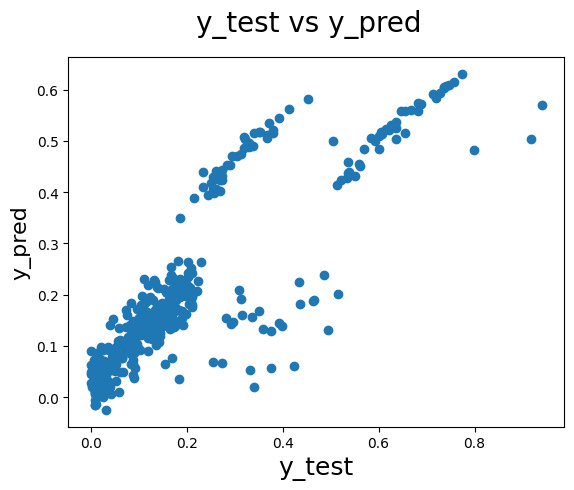

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
# charges = 0.1918age+0.1668 bmi+0.3830 yes-0.0366